<a href="https://colab.research.google.com/github/vicaranq/exploring-paligemma-MLLM/blob/main/mplugOwl2_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Packages

In [1]:
!git clone https://github.com/X-PLUG/mPLUG-Owl.git

Cloning into 'mPLUG-Owl'...
remote: Enumerating objects: 1227, done.
remote: Counting objects: 100% (268/268), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 1227 (delta 199), reused 156 (delta 133), pack-reused 959
Receiving objects: 100% (1227/1227), 30.29 MiB | 12.12 MiB/s, done.
Resolving deltas: 100% (430/430), done.


In [2]:
!pwd

/content


In [3]:
import sys
sys.path.append('/content/mPLUG-Owl/mPLUG-Owl2')

In [4]:
!pip install --upgrade pip
# !pip install icecream accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [5]:
!pip install -e /content/mPLUG-Owl/mPLUG-Owl2

Obtaining file:///content/mPLUG-Owl/mPLUG-Owl2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.7/137.7 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This co

In [6]:
import torch
from PIL import Image
import matplotlib.pyplot as plt

from transformers import TextStreamer
from transformers import AutoModel


from mplug_owl2.constants import IMAGE_TOKEN_INDEX, DEFAULT_IMAGE_TOKEN
from mplug_owl2.conversation import conv_templates, SeparatorStyle
from mplug_owl2.model.builder import load_pretrained_model
from mplug_owl2.mm_utils import process_images, tokenizer_image_token, get_model_name_from_path, KeywordsStoppingCriteria

In [12]:
from io import BytesIO
import requests


# Get Model and Processor

In [7]:
model_path = 'MAGAer13/mplug-owl2-llama2-7b'
device = 'cpu'
if torch.cuda.is_available():
    device = torch.device("cuda")
device

device(type='cuda')

In [10]:
# # Load model directly
# model = AutoModel.from_pretrained("MAGAer13/mplug-owl2-llama2-7b").to(device)

In [8]:
model_name = get_model_name_from_path(model_path)

#  GPU
# tokenizer, model, image_processor, context_len = load_pretrained_model(model_path, None, model_name, load_8bit=False, load_4bit=False, device="cuda") # model ~14GB/15GB in GPU
# tokenizer, model, image_processor, context_len = load_pretrained_model(model_path, None, model_name, load_8bit=True, load_4bit=False, device="cuda") #~8GB
tokenizer, model, image_processor, context_len = load_pretrained_model(model_path, None, model_name, load_8bit=False, load_4bit=True, device="cuda") # ~5 GB

# CPU
# tokenizer, model, image_processor, context_len = load_pretrained_model(model_path, None, model_name, load_8bit=False, load_4bit=True, device="cpu")
# NOTE: CPU model crashes on Google Colab (not enough free mem)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/749 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/5.05k [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/77.4k [00:00<?, ?B/s]

pytorch_model-1-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-10-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-11-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-12-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-13-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-14-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-15-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-16-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-17-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-18-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-19-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-2-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-20-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-21-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-22-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-23-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-24-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-25-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-26-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-27-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-28-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-29-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-3-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-30-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-31-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-32-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-33-of-33.bin:   0%|          | 0.00/1.30G [00:00<?, ?B/s]

pytorch_model-4-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-5-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-6-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-7-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-8-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

pytorch_model-9-of-33.bin:   0%|          | 0.00/472M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

Some weights of MPLUGOwl2LlamaForCausalLM were not initialized from the model checkpoint at MAGAer13/mplug-owl2-llama2-7b and are newly initialized: ['model.visual_abstractor.encoder.layers.1.crossattention.attention.q_pos_embed', 'model.visual_abstractor.encoder.layers.0.crossattention.attention.q_pos_embed', 'model.visual_abstractor.encoder.layers.4.crossattention.attention.k_pos_embed', 'model.visual_abstractor.encoder.layers.2.crossattention.attention.k_pos_embed', 'model.visual_abstractor.encoder.layers.0.crossattention.attention.k_pos_embed', 'model.visual_abstractor.encoder.layers.1.crossattention.attention.k_pos_embed', 'model.visual_abstractor.encoder.layers.3.crossattention.attention.q_pos_embed', 'model.visual_abstractor.encoder.layers.4.crossattention.attention.q_pos_embed', 'model.visual_abstractor.encoder.layers.2.crossattention.attention.q_pos_embed', 'model.visual_abstractor.encoder.layers.5.crossattention.attention.k_pos_embed', 'model.visual_abstractor.encoder.layers.

generation_config.json:   0%|          | 0.00/162 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/317 [00:00<?, ?B/s]

In [9]:
if tokenizer.pad_token is None:
  tokenizer.pad_token = tokenizer.eos_token

# Example Triggering One Image-Prompt Pair

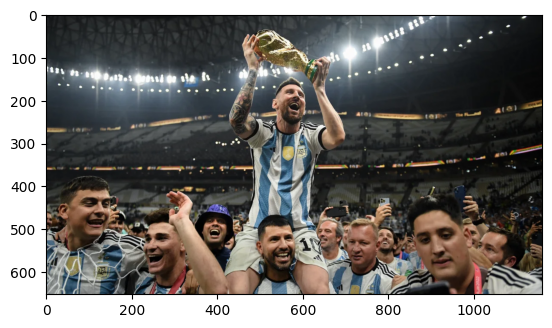

In [14]:
url = 'https://github.com/vicaranq/exploring-paligemma-MLLM/blob/main/MESSI.jpg?raw=true'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)

In [16]:
query = "Describe the image."

In [17]:
conv = conv_templates["mplug_owl2"].copy()
roles = conv.roles

# image = Image.open(image_file).convert('RGB')
image = img
max_edge = max(image.size) # We recommand you to resize to squared image for BEST performance.
image = image.resize((max_edge, max_edge))

image_tensor = process_images([image], image_processor)
image_tensor = image_tensor.to(model.device, dtype=torch.float16)

inp = DEFAULT_IMAGE_TOKEN + query
conv.append_message(conv.roles[0], inp)
conv.append_message(conv.roles[1], None)
prompt = conv.get_prompt()

input_ids = tokenizer_image_token(prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors='pt').unsqueeze(0).to(model.device)
stop_str = conv.sep2
keywords = [stop_str]
stopping_criteria = KeywordsStoppingCriteria(keywords, tokenizer, input_ids)
streamer = TextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True)


In [18]:
image_tensor.shape

torch.Size([1, 3, 448, 448])

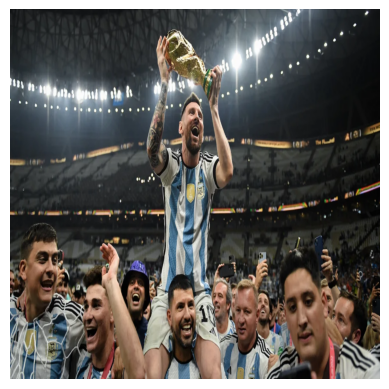

In [20]:
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()

In [21]:

temperature = 0.7
max_new_tokens = 512

with torch.inference_mode():
    output_ids = model.generate(
        input_ids,
        images=image_tensor,
        do_sample=True,
        temperature=temperature,
        max_new_tokens=max_new_tokens,
        streamer=streamer,
        use_cache=True,
        stopping_criteria=[stopping_criteria])

outputs = tokenizer.decode(output_ids[0, input_ids.shape[1]:]).strip()
print(outputs)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


The image shows a soccer stadium with many fans in the stands, most likely watching a game. A man is on the sports field, holding a trophy above his head, likely celebrating a win. Another man, possibly his teammate, is supporting him and holding the trophy as well.
There are several people in the crowd, all looking excited and engaged in the event. In total, there are 17 people visible, making up the crowd and the players on the field. The sports ball, likely a soccer ball, is also visible on the field.
The image shows a soccer stadium with many fans in the stands, most likely watching a game. A man is on the sports field, holding a trophy above his head, likely celebrating a win. Another man, possibly his teammate, is supporting him and holding the trophy as well.
There are several people in the crowd, all looking excited and engaged in the event. In total, there are 17 people visible, making up the crowd and the players on the field. The sports ball, likely a soccer ball, is also vi


# Functions

In [22]:

def predict(query, PIL_img, image_file = None):
  ''' Assumes model is already loaded and part of global scope '''

  conv = conv_templates["mplug_owl2"].copy()
  roles = conv.roles

  if image_file:
    image = Image.open(image_file).convert('RGB') # When path is provided
  else:
    image = PIL_img

  max_edge = max(image.size) # We recommand you to resize to squared image for BEST performance.
  image = image.resize((max_edge, max_edge))

  image_tensor = process_images([image], image_processor)
  image_tensor = image_tensor.to(model.device, dtype=torch.float16)

  inp = DEFAULT_IMAGE_TOKEN + query
  conv.append_message(conv.roles[0], inp)
  conv.append_message(conv.roles[1], None)
  prompt = conv.get_prompt()

  input_ids = tokenizer_image_token(prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors='pt').unsqueeze(0).to(model.device)
  stop_str = conv.sep2
  keywords = [stop_str]
  stopping_criteria = KeywordsStoppingCriteria(keywords, tokenizer, input_ids)
  streamer = TextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True)


  temperature = 0.7
  max_new_tokens = 150

  with torch.inference_mode():
      output_ids = model.generate(
          input_ids,
          images=image_tensor,
          do_sample=True,
          temperature=temperature,
          max_new_tokens=max_new_tokens,
          streamer=streamer,
          use_cache=False,
          stopping_criteria=[stopping_criteria],
          pad_token_id=tokenizer.pad_token_id)

  outputs = tokenizer.decode(output_ids[0, input_ids.shape[1]:]).strip()
  #print(outputs)

def show_img(PIL_image):
  plt.imshow(PIL_image)
  plt.axis('off')  # Hide the axis
  plt.show()


# Experiments:

## Experiment 1: Messi World Cup - Image Understanding

In [25]:
url = 'https://github.com/vicaranq/exploring-paligemma-MLLM/blob/main/MESSI.jpg?raw=true'
response = requests.get(url)
img_exp1 = Image.open(BytesIO(response.content))

What is the name of the main player in the picture?


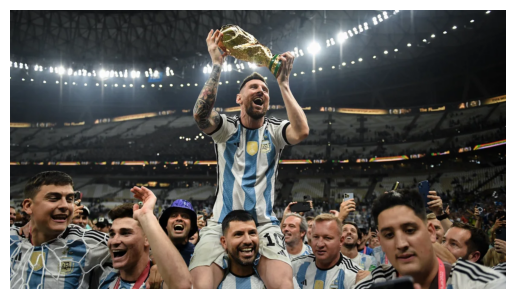

The main player in the picture is Messi.


In [26]:
query = "What is the name of the main player in the picture?"

print(query)
show_img(img_exp1)
predict(query, img_exp1)

In [61]:
query = "Provide a caption to the image."
print(query)
predict(query, img_exp1)

Provide a caption to the image.
A soccer player holding a trophy in front of a group of fans.


In [27]:
query = "Who is Lionel Messi?"
predict(query, img_exp1)

Lionel Messi is an Argentine professional football player who is considered one of the greatest football players of all time. He is popularly known for his exceptional skills, speed, dribbling abilities, and goal-scoring prowess. Messi plays as a forward for both the Argentina national team and FC Barcelona, and he is widely recognized for his success in international football competitions.


In [28]:
query = "Describe the image in detail?"
predict(query, img_exp1)

The image captures a lively scene of a group of men cheering for a soccer player, likely Argentina's Messi, who is standing on their shoulders. He is holding up a trophy above his head, celebrating a victory.
In total, there are 15 people visible in the scene, with some standing closer to the foreground and others further back. It appears that the event is taking place in a stadium, as there are multiple benches and chairs scattered throughout the area, along with a few backpacks and handbags placed on the ground.


In [29]:
query = "What tournament is this picture about?"
predict(query, img_exp1)

This picture is about the FIFA World Cup, as the man is holding the trophy aloft in front of a crowd of people.


In [30]:
query = "What is Messi holding?"
predict(query, img_exp1)

Messi is holding a trophy in his hands.


In [31]:
query = "Who are the people in the picture?"
predict(query, img_exp1)

The people in the picture are soccer fans, and they are cheering and celebrating their team's victory.


In [32]:
query = "Is the trophy in the picture related to the UEFA Champions League?" # Inducing error
predict(query, img_exp1)

Yes, the trophy in the picture is related to the UEFA Champions League, as it is a soccer trophy.


In [33]:
query = "Is the trophy in the picture related to the FIFA World Cup?"
predict(query, img_exp1)

Yes, the trophy in the picture is related to the FIFA World Cup, as it is the FIFA World Cup Trophy. Members of the Argentina national soccer team are holding it up, celebrating their victory.


### Image reasoning on the past and future

In [79]:
query = "What happened before the image was taken?"
print(query)
predict(query, img_exp1)

What happened before the image was taken?
Before the image was taken, Argentina's soccer team had won the World Cup championship, and the team captain, Lionel Messi, was holding the trophy.


In [80]:
query = "What might happen after the image was taken?"
print(query)
predict(query, img_exp1)

What might happen after the image was taken?
After the image was taken, the crowd of people watching the soccer game likely cheered and celebrated, showering the soccer players with praise and support. The players, including the one carrying the trophy, may have been acknowledged and appreciated by their fans for their performance. Additionally, the team might have been honored or presented with a trophy, acknowledging their success in the championship. This would be a memorable moment for both the players and the fans, as they would engage in conversations, share their excitement, and celebrate the achievement together. The soccer players may also be featured in interviews and photos, further solidifying their place in the history of the game.


## Experiment 2: CR7 Champions League - Inducing Error and Model Error Awareness

In [34]:
url = 'https://github.com/vicaranq/exploring-paligemma-MLLM/blob/main/CR7.jpg?raw=true'
response = requests.get(url)
img_exp2 = Image.open(BytesIO(response.content))

What is the name of the main player in the picture?


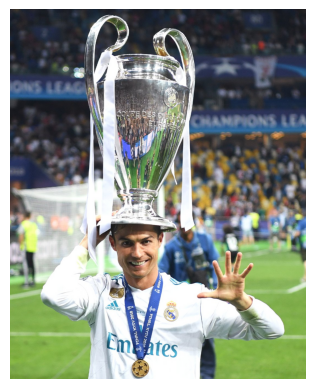

The main player in the picture is Cristiano Ronaldo.


In [37]:
query = "What is the name of the main player in the picture?"

print(query)
show_img(img_exp2)
predict(query, img_exp2)

In [63]:
query = "Provide a caption for this image."
predict(query, img_exp2)

soccer player with trophy and a large adidas sign


In [38]:
query = "Who is Cristiano Ronaldo?"
predict(query, img_exp2)

Cristiano Ronaldo is a Portuguese professional football player who plays as a forward for both the Spanish club Real Madrid and the Portugal national team. He is considered one of the greatest football players of all time and has won numerous accolades, including five FIFA Ballon d'Or awards, as well as numerous national and international titles and recognitions.


In [39]:
query = "Describe the image in detail?"
predict(query, img_exp2)

The image shows a man walking across a sports field, holding up a large trophy with the words "Champions League" written on it. He appears to be a professional athlete, wearing a jersey, which reads "ADIDAS." The man is also wearing a headband.
In the background, several other players can be seen standing on the field, likely teammates or opponents. Some of them are wearing jerseys as well, emphasizing the competitive nature of the scene.


In [40]:
query = "What tournament is this picture about?"
predict(query, img_exp2)

This picture is about the UEFA Champions League, a prestigious club football competition in Europe.


In [41]:
query = "What is Cristiano holding?"
predict(query, img_exp2)

Cristiano is holding a trophy, specifically the UEFA Champions League trophy.


In [42]:
query = "Who are the people in the picture?"
predict(query, img_exp2)

The people in the picture are a football player holding a trophy and standing on a field.


What is Messi holding?


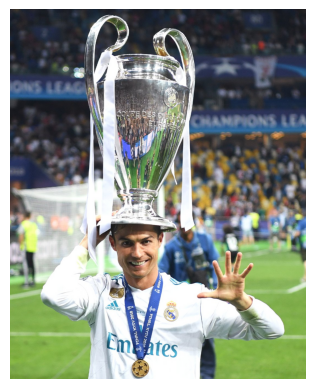

Messi is holding a trophy.


In [43]:
query = "What is Messi holding?" # Inducing error
print(query)
show_img(img_exp2)
predict(query, img_exp2)

In [44]:
query = "Is Messi in the picture?"
print(query)
predict(query, img_exp2)

Is Messi in the picture?
No, Messi is not in the picture. The man holding the trophy is showing his support for Emirates.


### Could the model predict if its answer was incorrect?

Given the question: 
Q:'What is Messi holding?'
 and the answer: 
A:'Messi is holding a trophy while standing on a soccer field.'
 is answer A correct for question Q given the input image? Provide a yes or no answer.


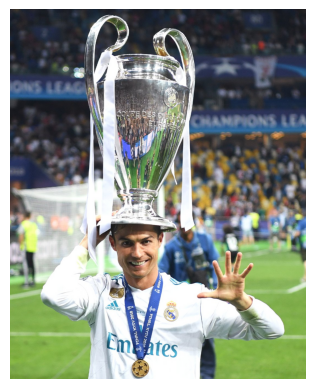

Yes


In [45]:
query = "Given the question: \nQ:'What is Messi holding?'\n and the answer: \nA:'Messi is holding a trophy while standing on a soccer field.'\n is answer A correct for question Q given the input image? Provide a yes or no answer."
print(query)
show_img(img_exp2)
predict(query, img_exp2)

Given the question: 
Q:'If Messi is in the picture, what is Messi holding?'
 and the answer: 
A:'Messi is holding a trophy while standing on a soccer field.'
 is answer A correct for question Q given the input image? Provide a yes or no answer.


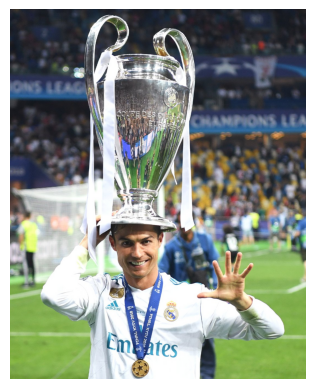

No


In [78]:
query = "Given the question: \nQ:'If Messi is in the picture, what is Messi holding?'\n and the answer: \nA:'Messi is holding a trophy while standing on a soccer field.'\n is answer A correct for question Q given the input image? Provide a yes or no answer."
print(query)
show_img(img_exp2)
predict(query, img_exp2)

Only by adding 'If Messi is in the picture" prior to the question where I am inducing the error, the model understands that the answer was wrong. It seems that giving direct instruction and some room for doubt, then the model is capable to answer better the questions.

Given the question: 
Q: 'What is Messi holding?'
 and the answer: 
A: 'Messi is holding a trophy while standing on a soccer field.'
 is A the correct answer for the question Q? If not, explain why.


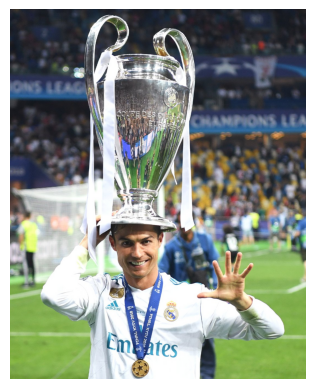

No, the correct answer for the question Q is not provided. The given answer is about Messi holding a trophy, but the question asks about Messi holding a specific object (a cell phone), which is not mentioned in the answer provided.


In [46]:
query = "Given the question: \nQ: 'What is Messi holding?'\n and the answer: \nA: 'Messi is holding a trophy while standing on a soccer field.'\n is A the correct answer for the question Q? If not, explain why."
print(query)
show_img(img_exp2)
predict(query, img_exp2)

It seems the model is capable of understanding that the answer is not correct. However, it still struggles to understand why. It starts hallucinating while trying to provide an answer.

What about a correct match?

Given the question: 
Q:'What is Cristiano holding?'
 and the answer: 
A:'Cristiano is holding a trophy.'
 is answer A correct for question Q given the input image? Provide a yes or no answer.


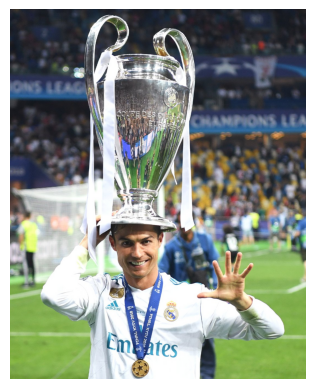

Yes


In [47]:
query = "Given the question: \nQ:'What is Cristiano holding?'\n and the answer: \nA:'Cristiano is holding a trophy.'\n is answer A correct for question Q given the input image? Provide a yes or no answer."
print(query)
show_img(img_exp2)
predict(query, img_exp2)

Given the question: 
Q:'What is Cristiano holding?'
 and the answer: 
A:'Cristiano is holding a trophy.'
 is answer A correct for question Q given the input image? Explain why.


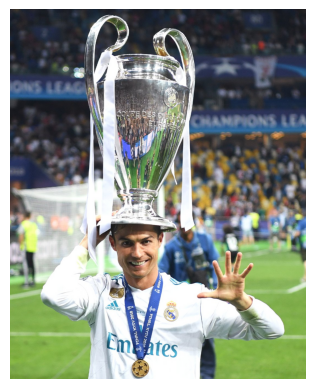

Yes, answer A is correct for question Q. In the image, Cristiano is holding a large trophy, which is the correct answer for the question.


In [48]:
query = "Given the question: \nQ:'What is Cristiano holding?'\n and the answer: \nA:'Cristiano is holding a trophy.'\n is answer A correct for question Q given the input image? Explain why."
print(query)
show_img(img_exp2)
predict(query, img_exp2)

Does it understand the difference between World Cup and Champions League?

In [49]:
query = "Is the trophy in the picture related to the World Cup?"
print(query)
predict(query, img_exp2)

Is the trophy in the picture related to the World Cup?
Yes, the trophy is related to the World Cup. It is a UEFA Champions League trophy, which is a prestigious football competition organized by the Union of European Football Associations (UEFA).


Given the question: 
Q: 'Is the trophy in the picture related to the World Cup?'
 and the answer: 
A:'Yes.'
Is A the correct answer for question Q given the input image? Explain why.


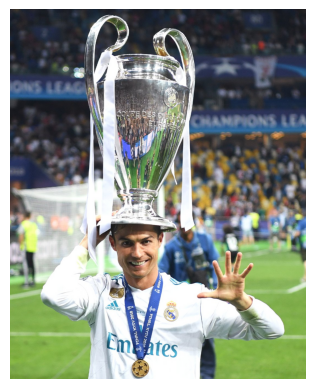

Yes, the correct answer for question Q is 'Yes.' The trophy in the picture is related to the World Cup because it is a large silver trophy with the words "Champions League" inscribed on it. This trophy is commonly awarded to the winner of the UEFA Champions League, which is a prestigious and international soccer competition that takes place among top European clubs and is widely known for its association with the World Cup.


In [52]:
query = "Given the question: \nQ: 'Is the trophy in the picture related to the World Cup?'\n and the answer: \nA:'Yes.'\nIs A the correct answer for question Q given the input image? Explain why."
print(query)
show_img(img_exp2)
predict(query, img_exp2)

It has a wrong understanding that the trophy for the World Cup is the same as the trophy for the Champions League. Thus, it wrongly answer questions in this topic mixing up the two cups.

Interestingly, the model understands in the last question that the trophy is from the UEFA Champions League but then it makes the connection between football (soccer) and the World Cup.

What if the model had this info apriori?

Given the question: 
Q: 'Is the trophy in the picture related to the World Cup?'
 and the answer: 
A:'Yes.'
Is A the correct answer for question Q given the input image? Explain why.
Take into consideration that the UEFA Champions League and the World Cup are two different tournaments with different trophies. 


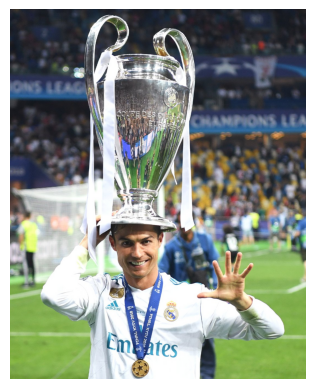

Yes, the correct answer is A. The trophy in the picture is related to the World Cup because it is the UEFA Champions League trophy, which is a separate tournament and trophy from the FIFA World Cup.


In [53]:
query = "Given the question: \nQ: 'Is the trophy in the picture related to the World Cup?'\n and the answer: \nA:'Yes.'\nIs A the correct answer for question Q given the input image? Explain why.\nTake into consideration that the UEFA Champions League and the World Cup are two different tournaments with different trophies. "
print(query)
show_img(img_exp2)
predict(query, img_exp2)

The model fails again even when I specifically mention that the two tournaments are different and have different trophies.

### Image reasoning on the past and future

In [81]:
query = "What happened before the image was taken?"
print(query)
predict(query, img_exp2)

What happened before the image was taken?
Before the image was taken, Cristiano Ronaldo and his team, Real Madrid, won the UEFA Champions League. The image features Ronaldo holding a trophy over his head and celebrating his victory.


In [82]:
query = "What might happen after the image was taken?"
print(query)
predict(query, img_exp2)

What might happen after the image was taken?
After the image was taken, the man, who is holding the large trophy above his head, would most likely be celebrating his win with his teammates, fans, and friends. The victory might be the result of a soccer match, and the group would be sharing the joy and congratulating each other for their accomplishment. They might also be preparing to attend press conferences, media events, or participate in a parade to celebrate the team's success. Overall, the focus is on the achievement, camaraderie, and the excitement that comes with winning a significant title.


## Experiment 3: Zidane vs Buffon - Model Reasoning

In [55]:
url = 'https://github.com/vicaranq/exploring-paligemma-MLLM/blob/main/zidane_buffon_penalty.jpg?raw=true'
response = requests.get(url)
img_exp3 = Image.open(BytesIO(response.content))

Describe the image.


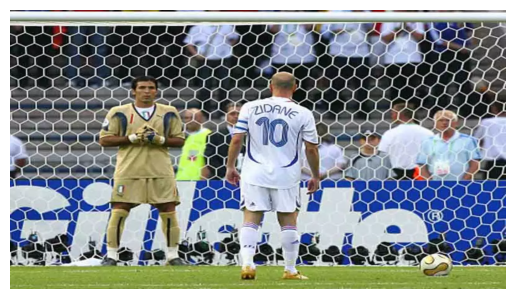

The image features two soccer players standing in front of a goal. One player is wearing a white jersey and the other player has a blue jersey. Both of them are looking at each other, possibly contemplating their next move or anticipating the outcome of the play. A soccer ball is positioned between them, and there are additional soccer balls scattered around the playing field.
The scene also includes a group of people standing behind the players, watching the game unfold. They are dispersed throughout the background, showing various levels of interest in the ongoing match.


In [56]:
query = "Describe the image."

print(query)
show_img(img_exp3)
predict(query, img_exp3)

Provide a caption to the image.


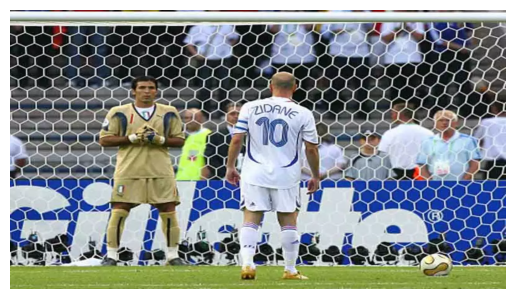

Soccer players on a soccer field in front of a goal.


In [57]:
query = "Provide a caption to the image."

print(query)
show_img(img_exp3)
predict(query, img_exp3)

In [58]:
query = "Who is in the image?"
print(query)
predict(query, img_exp3)

Who is in the image?
In the image, there are two soccer players standing on the field.


In [64]:
query = "What are the names of the players in the image?"
print(query)
predict(query, img_exp3)

What are the names of the players in the image?
The names of the players in the image are Zidane and Claude Makelele.


The model wrongly answered this question. It was able to infer that one player was Zidane given the shirt name, but the other player who is Buffon from the Italy team, was wrongly identified as Claude Makelele.

In [75]:
query = "Which teams were playing?"
print(query)
predict(query, img_exp3)

Which teams were playing?
The teams playing were the Czech team and the Spanish team.


In [74]:
query = "Which national teams were playing?"
print(query)
predict(query, img_exp3)

Which national teams were playing?
Unfortunately, I cannot provide the specific national teams playing in the image without more information.


The model does not detect the national team although it knows the player is Zidane who is from France. One could also see Italy flag on Buffon's jearsey which should help the model to predict the national team. In this case, it fails.

### Image reasoning on the past and future

In [62]:
query = "What happened before the image was taken?"
print(query)
predict(query, img_exp3)

What happened before the image was taken?
Before the image was taken, the soccer players were engaged in a match, and there were goals present on the field. One player, Zidane, with the number 10 on his jersey, was seen standing near a goal, possibly waiting for the ball to come his way or preparing for a play. His teammates were also present on the field, indicating a competitive atmosphere.


In [60]:
query = "What might happen after the image was taken?"
print(query)
predict(query, img_exp3)

What might happen after the image was taken?
After the image was taken, the soccer player wearing the number 10 jersey would likely take the soccer ball with him and continue playing the game. He is seen getting ready to kick the ball, and the man behind the net is a goalie who would be trying to stop the ball from entering the goal. Additionally, the other players on the field would continue their efforts to score goals, defend their positions, and maintain the flow of the game. The soccer players and the audience would then watch the game unfold, cheering for their respective teams and enjoying the excitement of the match.


### Cross-experiment questions

In [65]:
query = "Is Messi or Cristiano Ronaldo in the image?"
print(query)
predict(query, img_exp3)

Is Messi or Cristiano Ronaldo in the image?
The image does not have either Messi or Cristiano Ronaldo in it.


In [66]:
query = "Is Messi going to kick the ball?"
print(query)
predict(query, img_exp3)

Is Messi going to kick the ball?
Yes, Messi is getting ready to kick the ball.


In [67]:
query = "Is Zidane going to kick the ball?"
print(query)
predict(query, img_exp3)

Is Zidane going to kick the ball?
Yes, Zidane is planning to kick the soccer ball, which is placed on the field.


The model can be easily induced to produce a mistake by asking a question were the subject is implied to be present. In this case, the question 'Is Messi going to kick the ball?' induces the model to produce a wrong answer because indeed it detects that someone will kick the ball. However, it understands that Messi is not in the picture.

Given the question: 
Q: 'Is Messi going to kick the ball?'
 and the answer: 
A:'Yes.'
Is A the correct answer for question Q given the input image? Explain why.



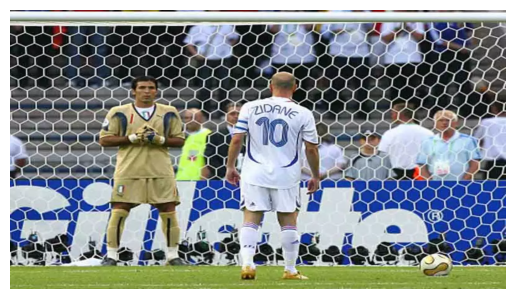

A: Yes.
The correct answer is A, as the image shows Messi stepping up to the soccer ball at the goal. This indicates that Messi is going to kick the ball.


In [69]:
query = "Given the question: \nQ: 'Is Messi going to kick the ball?'\n and the answer: \nA:'Yes.'\nIs A the correct answer for question Q given the input image? Explain why.\n"
print(query)
show_img(img_exp3)
predict(query, img_exp3)

In [71]:
query = "If Messi is in the image, is Messi going to kick the ball?"
print(query)
predict(query, img_exp3)

If Messi is in the image, is Messi going to kick the ball?
Yes, Messi is in the image, and he is about to kick the soccer ball.


Given the question: 
Q: 'If Messi is in the image, is Messi going to kick the ball?'
 and the answer: 
A:'Yes.'
Is A the correct answer for question Q given the input image? Explain why.



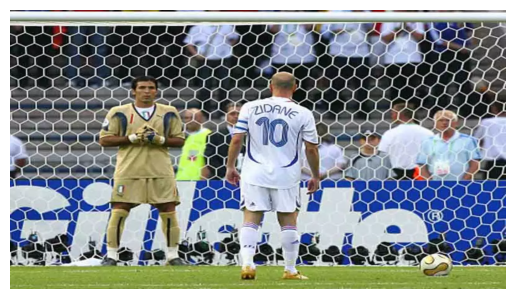

A: No.
The correct answer is No because Messi is not in the image. There are two soccer players, and one of them is wearing the number 10 jersey, which is not Messi.


In [70]:
query = "Given the question: \nQ: 'If Messi is in the image, is Messi going to kick the ball?'\n and the answer: \nA:'Yes.'\nIs A the correct answer for question Q given the input image? Explain why.\n"
print(query)
show_img(img_exp3)
predict(query, img_exp3)

The model fails to answer this question: `If Messi is in the image, is Messi going to kick the ball?` however, it understands that the answer was wrong and has a good reasoning of why it is not correct.

What if we try to induce a wrong answer by using an action not present in the image?

Is Messi holding a trophy?


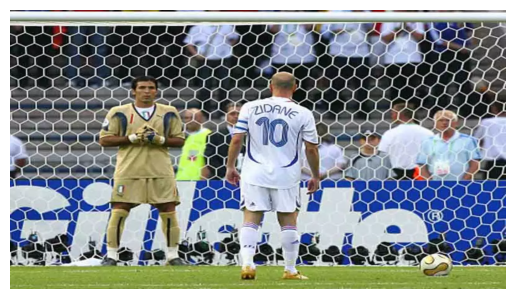

No, Messi is not holding a trophy in the image.


In [77]:
query = "Is Messi holding a trophy?"
print(query)
show_img(img_exp3)
predict(query, img_exp3)

Is Messi going to kick the ball?


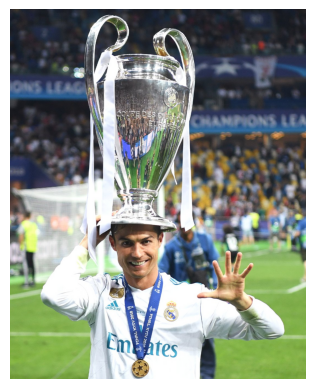

Yes, Messi is going to kick the ball in the image, as he is standing next to a soccer ball while holding up a large trophy.


In [76]:
query = "Is Messi going to kick the ball?"
print(query)
show_img(img_exp2)
predict(query, img_exp2)

Given the question: 
Q: 'Is Messi going to kick the ball?'
 and the answer: 
A:'Yes.'
Is A the correct answer for question Q given the input image? Explain why.



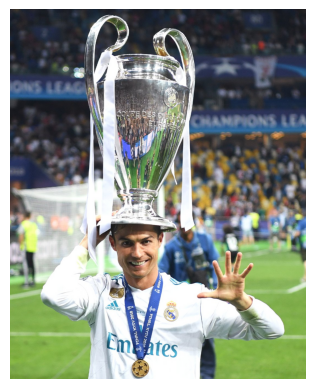

No, the correct answer for the question 'Is Messi going to kick the ball?' is not given in the input image. The image portrays a man holding a trophy on his head, wearing a blue shirt with the name Emirates. There is no mention or information about Messi in the image.


In [68]:
query = "Given the question: \nQ: 'Is Messi going to kick the ball?'\n and the answer: \nA:'Yes.'\nIs A the correct answer for question Q given the input image? Explain why.\n"
print(query)
show_img(img_exp2)
predict(query, img_exp2)

Although the model responds wrong the question "Is Messi going to kick the ball?" on the Cristiano Ronaldo image, it understands that its answer is wrong:

`No, the correct answer for the question 'Is Messi going to kick the ball?' is not given in the input image. The image portrays a man holding a trophy on his head, wearing a blue shirt with the name Emirates. There is no mention or information about Messi in the image.`

# Conclusion

From all these experiments we can see the potential of this model to understand images and detect some of the most famous football (futbol/soccer) players. It also can detect actions such as holding up a trophy or kicking the ball. It detects objects such as jerseys, numbers, names on the shirt, and even environment such as a football field.

One of the weak sides of the images is that it seems that one could easily induce an error by making the model infer that someone not present in the image is executing an action present in the image. Interestingly, the model recognizes that this person is not in the image, and in many cases, the model itself can be used to find if the response was wrong.